# Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Load

In [2]:
regular = pd.read_csv("./data/Regular_Season_Batter_pre.csv")

In [8]:
regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,OBP,E,height/weight,year_born,OPS,외국인,weight,weight_category,age,age_category
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.383,9,177cm/93kg,1985,0.902,0,93.0,2.0,33,2
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,1,180cm/72kg,1992,0.000,1,72.0,0.0,19,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.337,6,180cm/72kg,1992,0.686,1,72.0,0.0,22,0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.348,15,180cm/72kg,1992,0.673,1,72.0,0.0,23,1
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.232,7,180cm/72kg,1992,0.489,1,72.0,0.0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,25,1
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,26,1
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,27,1
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,0.359,4,181cm/82kg,1989,0.761,1,82.0,1.0,28,1


In [9]:
regular.drop(["batter_id"], axis=1, inplace=True)

regular

,batter_name,year,team,avg,G,AB,R,H,2B,3B,...,OBP,E,height/weight,year_born,OPS,외국인,weight,weight_category,age,age_category
0,가르시아,2018,LG,0.339,50,183,27,62,9,0,...,0.383,9,177cm/93kg,1985,0.902,0,93.0,2.0,33,2
1,강경학,2011,한화,0.000,2,1,0,0,0,0,...,0.000,1,180cm/72kg,1992,0.000,1,72.0,0.0,19,0
2,강경학,2014,한화,0.221,41,86,11,19,2,3,...,0.337,6,180cm/72kg,1992,0.686,1,72.0,0.0,22,0
3,강경학,2015,한화,0.257,120,311,50,80,7,4,...,0.348,15,180cm/72kg,1992,0.673,1,72.0,0.0,23,1
4,강경학,2016,한화,0.158,46,101,16,16,3,2,...,0.232,7,180cm/72kg,1992,0.489,1,72.0,0.0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,황진수,2014,롯데,0.000,5,5,0,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,25,1
2450,황진수,2015,롯데,0.000,2,2,0,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,26,1
2451,황진수,2016,롯데,0.000,11,10,2,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,82.0,1.0,27,1
2452,황진수,2017,롯데,0.291,60,117,18,34,6,2,...,0.359,4,181cm/82kg,1989,0.761,1,82.0,1.0,28,1


In [12]:
regular.isna().sum()

batter_name          0
year                 0
team                 0
avg                 26
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 26
OBP                 24
E                    0
height/weight      802
year_born            0
OPS                 26
외국인                  0
weight             802
weight_category    802
age                  0
age_category         0
dtype: int64

In [103]:
df = regular.copy()

In [104]:
df.drop(["height/weight", "weight", "weight_category"], axis = 1, inplace=True)

In [105]:
# 결측치를 제거, 결측치 중 몸무게와 키가 없는 데이터가 802개나 되기 때문에 몸무게와 키를 제외하고 분석
# 그 외에 출루율 및 장타율과 OPS가 결측된 데이터는 삭제한다.
df.dropna(inplace=True)

In [106]:
df.head()

,batter_name,year,team,avg,G,AB,R,H,2B,3B,...,SO,GDP,SLG,OBP,E,year_born,OPS,외국인,age,age_category
0,가르시아,2018,LG,0.339,50,183,27,62,9,0,...,25,3,0.519,0.383,9,1985,0.902,0,33,2
1,강경학,2011,한화,0.000,2,1,0,0,0,0,...,1,0,0.000,0.000,1,1992,0.000,1,19,0
2,강경학,2014,한화,0.221,41,86,11,19,2,3,...,28,1,0.349,0.337,6,1992,0.686,1,22,0
3,강경학,2015,한화,0.257,120,311,50,80,7,4,...,58,3,0.325,0.348,15,1992,0.673,1,23,1
4,강경학,2016,한화,0.158,46,101,16,16,3,2,...,30,5,0.257,0.232,7,1992,0.489,1,24,1


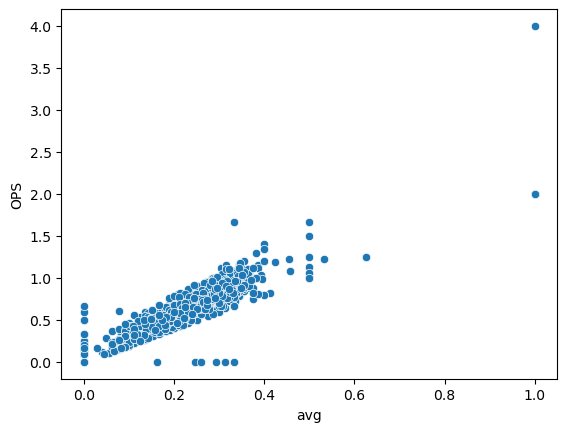

In [107]:
# outlier 존재
sns.scatterplot(x=df["avg"], y=df["OPS"])
plt.show()

In [108]:
avg_iqr = np.subtract(*np.quantile(df["avg"], [0.75, 0.25]))
avg_iqr

0.08799999999999997

In [109]:
df = df[(df["avg"] <= (np.quantile(df["avg"], 0.75) + avg_iqr*1.5)) & (df["avg"] >= (np.quantile(df["avg"], 0.25) - avg_iqr*1.5))]

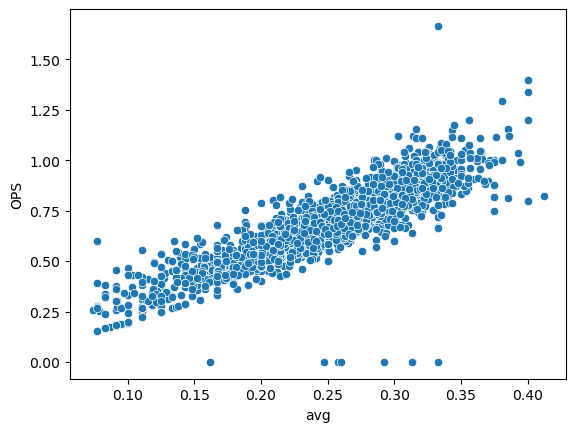

In [110]:
# outlier 제거
sns.scatterplot(x=df["avg"], y=df["OPS"])
plt.show()

In [111]:
# 결측치와 이상치 포함 약 200개의 데이터 제거
df.shape

(2221, 27)

In [112]:
df.columns

Index(['batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'E', 'year_born', 'OPS', '외국인', 'age', 'age_category'],
      dtype='object')

In [113]:
df = df[['batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'E', 'year_born', '외국인', 'age', 'age_category', 'OPS']]

In [114]:
# 분석에 필요없는 타자 이름과 팀 제거
df.drop(["batter_name", "team"], axis=1, inplace=True)

## data split

In [125]:
X = df.drop("OPS", axis=1)
y = df["OPS"]

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [127]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1776, 24), (445, 24), (1776,), (445,))

# modeling

In [130]:
rf = RandomForestRegressor()

In [131]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [133]:
rf.score(x_test, y_test)

0.9972535277848744

In [136]:
pred = rf.predict(x_test)

In [137]:
np.sqrt(mean_squared_error(y_test, pred))

0.009391006195721259

In [138]:
pre = pd.read_csv("./data/Pre_Season_Batter_pre.csv")

In [144]:
pre

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,OBP,E,height/weight,year_born,OPS,외국인,weight,weight_category,age,age_category
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.409,1,177cm/93kg,1985,0.959,0.0,93,2,33,2
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.500,0,180cm/72kg,1992,0.500,1.0,72,0,19,0
2,1,강경학,2014,한화,-,4,0,2,0,0,...,NaN,0,180cm/72kg,1992,NaN,1.0,72,0,22,0
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.286,2,180cm/72kg,1992,0.416,1.0,72,0,23,1
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.212,0,180cm/72kg,1992,0.493,1.0,72,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.448,1,183cm/96kg,1987,1.041,1.0,96,3,27,1
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.389,0,183cm/96kg,1987,0.822,1.0,96,3,28,1
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.370,1,183cm/96kg,1987,0.799,1.0,96,3,29,2
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.333,3,183cm/96kg,1987,0.833,1.0,96,3,31,2


In [146]:
pre.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'OPS', '외국인', 'weight',
       'weight_category', 'age', 'age_category'],
      dtype='object')

In [147]:
pre.drop(["batter_id", "batter_name", "team", "height/weight", "weight", "weight_category"], axis=1)

,year,avg,G,AB,R,H,2B,3B,HR,TB,...,SO,GDP,SLG,OBP,E,year_born,OPS,외국인,age,age_category
0,2018,0.350,7,20,1,7,1,0,1,11,...,3,1,0.550,0.409,1,1985,0.959,0.0,33,2
1,2011,0.000,4,2,2,0,0,0,0,0,...,1,0,0.000,0.500,0,1992,0.500,1.0,19,0
2,2014,-,4,0,2,0,0,0,0,0,...,0,0,NaN,NaN,0,1992,NaN,1.0,22,0
3,2015,0.130,10,23,3,3,0,0,0,3,...,9,0,0.130,0.286,2,1992,0.416,1.0,23,1
4,2016,0.188,14,32,4,6,1,1,0,9,...,10,0,0.281,0.212,0,1992,0.493,1.0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,2014,0.407,10,27,3,11,2,0,1,16,...,5,0,0.593,0.448,1,1987,1.041,1.0,27,1
1389,2015,0.333,11,30,8,10,3,0,0,13,...,3,0,0.433,0.389,0,1987,0.822,1.0,28,1
1390,2016,0.310,16,42,8,13,3,1,0,18,...,4,0,0.429,0.370,1,1987,0.799,1.0,29,2
1391,2018,0.250,6,16,3,4,1,0,1,8,...,6,0,0.500,0.333,3,1987,0.833,1.0,31,2


In [149]:
sub = pd.read_csv("./data/submission.csv")

In [150]:
sub

,batter_id,batter_name
0,1,강경학
1,2,강구성
2,3,강민국
3,4,강민호
4,5,강백호
...,...,...
215,337,홍재호
216,338,홍창기
217,341,황윤호
218,342,황재균
